# Homework 1

## Instructions

First, ensure you have cloned the [course repository](https://github.com/lydiaYchen/DDL25Spring).

Then, open the [interactive notebook version](https://github.com/lydiaYchen/DDL25Spring/blob/main/lab/homework-1.ipynb) of this homework from your local copy.

For part A, fill in the code and answers within the notebook and save your changes.

For part B, create and archive the necessary Python/shell scripts together.

Finally, upload the notebook and the archive to the assignment in ILIAS.

## Part A (12 points)

### Note

When not otherwise specified, use the following parameter values in experiment runs:
- `nr_clients` (N): 100
- `lr`: 0.01
- `client_fraction` (C): 0.1
- `nr_local_epochs` (E): 1
- `batch_size` (B): 100
- `nr_rounds`: 10
- `iid`: True

For all exercises, pass `seed = 10` to calls for splitting data, server initialization, or plotting.

In [3]:
import pandas as pd
import seaborn as sns
from tutorial_1a.hfl_complete import *

n = 100
lr = 0.01
c = 0.1
e = 1
b = 100
nr_rounds = 10
iid = True
seed = 10

### Exercise A1: FedSGD with weights (3 points)

#### Question

_(2 points)_ Implement a version of FedSGD that uses weights in its updates, like FedAvg, instead of the gradients from the version of the tutorials. The two FedSGD versions should have the same test accuracy after each round (with a tolerance of at most 0.02%). To show this, compare their output for the following two scenarios over *5 rounds*:
- `lr = 0.01, client_subsets = split(100, True, ...), client_fraction = 0.5`
- `lr = 0.1, client_subsets = split(50, False, ...), client_fraction = 0.2`

*Tip:* You can use the existing FedAvg implementation to minimize the amount of code writing required.

_(1 point)_ Explain in which cases (about the different parameters for decentralized learning) the two are equivalent.

#### Answer

### Scenario 1

`lr = 0.01, client_subsets = split(100, True, ...), client_fraction = 0.5`


In [12]:
# FED AVG VERSION - using/passing weights instead of gradients
client_subsets_1 = split(100, True, seed=seed)
batch_size = len(client_subsets_1[0])

fed_avg_server_1 = FedAvgServer(lr=0.01, batch_size=batch_size, client_subsets=client_subsets_1, client_fraction=0.5, nr_local_epochs=1, seed=seed)

fed_avg_result_1 = fed_avg_server_1.run(nr_rounds=5)
# fed_avg_result_1

In [15]:
# FED SGD VERSION - using/passing gradients and not weights
fed_sgd_server_1 = FedSgdGradientServer(lr=0.01, client_subsets=client_subsets_1, client_fraction=0.5, seed=seed)
fed_sgd_result_1 = fed_sgd_server_1.run(nr_rounds=5)

# fed_sgd_result_2

##### Comparison between results FedAvg and FedSGD in Scenario 1

In [17]:
print(f"Fed Avg test results {fed_avg_result_1.test_accuracy}")
print(f"Fed SGD test results {fed_sgd_result_1.test_accuracy}")

Fed Avg test results [8.91, 13.42, 18.44, 23.01, 27.58]
Fed SGD test results [8.91, 13.42, 18.44, 23.01, 27.58]


### Scenario 2

`lr = 0.1, client_subsets = split(50, False, ...), client_fraction = 0.2`

In [21]:
client_subsets_2 = split(50, False, seed=seed)
batch_size_2 = len(client_subsets_2[0])

fed_avg_server_2 = FedAvgServer(lr=0.1, batch_size=batch_size_2, client_subsets=client_subsets_2, client_fraction=0.2, nr_local_epochs=1, seed=seed)
fed_avg_result_2 = fed_avg_server_2.run(nr_rounds=5)

#fed_avg_result_2

In [22]:
fed_sgd_server_2 = FedSgdGradientServer(lr=0.1, client_subsets=client_subsets_2, client_fraction=0.2, seed=seed)
fed_sgd_result_2 = fed_sgd_server_2.run(nr_rounds=5)

##### Comparison between results FedAvg and FedSGD in Scenario 2

In [23]:
print(f"Fed Avg test results {fed_avg_result_2.test_accuracy}")
print(f"Fed SGD test results {fed_sgd_result_2.test_accuracy}")

Fed Avg test results [15.51, 24.64, 13.57, 20.0, 40.26]
Fed SGD test results [15.51, 24.64, 13.57, 20.0, 40.26]


#### Answer to Question 

Q: Explain in which cases (about the different parameters for decentralized learning) the two are equivalent.

A:

### Exercise A2: Client number & fraction (4 points)

In [49]:
import pandas as pd

def run_experiment(n, c, algorithm, seed=10):
    client_subsets = split(n, True, seed)
    if algorithm == "FedSGD":
        server = FedSgdGradientServer(lr, client_subsets, c, seed)
    else:  # FedAvg
        server = FedAvgServer(lr, b, client_subsets, c, e, seed)
    
    result = server.run(nr_rounds=nr_rounds)
    # result = server.run(nr_rounds=2)
    
    message_count = result.message_count
    test_accuracy = result.test_accuracy
        
    return sum(message_count), test_accuracy

In [52]:
# Table 1: Different client numbers
results_n = []
for n in [10, 50, 100]:
# for n in [10]:
    for algorithm in ["FedSGD", "FedAvg"]:
    # for algorithm in ["FedSGD"]:
        print(f"\nRunning experiment: Algorithm={algorithm}, N={n}, C=0.1")
    
        message_count, test_accuracy = run_experiment(n=n, c=0.1, algorithm=algorithm)
    
        results_n.append({
                "Algorithm": algorithm,
                "N": n,
                "C": c,
                "Message count": message_count,
                "Test accuracy": test_accuracy[-1]
            })


Running experiment: Algorithm=FedSGD, N=10, C=0.1



Running experiment: Algorithm=FedAvg, N=10, C=0.1



Running experiment: Algorithm=FedSGD, N=50, C=0.1



Running experiment: Algorithm=FedAvg, N=50, C=0.1



Running experiment: Algorithm=FedSGD, N=100, C=0.1



Running experiment: Algorithm=FedAvg, N=100, C=0.1


In [53]:
df_n = pd.DataFrame(results_n, columns=["Algorithm", "N", "C", "Message count", "Test accuracy"])

df_n

,Algorithm,N,C,Message count,Test accuracy
0,FedSGD,10,0.1,110,43.23
1,FedAvg,10,0.1,110,93.22
2,FedSGD,50,0.1,550,43.11
3,FedAvg,50,0.1,550,87.93
4,FedSGD,100,0.1,1100,43.17
5,FedAvg,100,0.1,1100,81.33


#### Question 1

_(2 points)_ Run the necessary experiments to fill in the following table showing the final message count and test accuracy of FedSGD and FedAvg for different total client numbers:

| Algorithm | N   | C   | Message count | Test accuracy |
| --------- | --- | --- |---------------|---------------|
| FedSGD    | 10  | 0.1 | 110           | 43.23         |
| FedAvg    | 10  | 0.1 | 110           | 93.22         |
| FedSGD    | 50  | 0.1 | 550           | 43.11         |
| FedAvg    | 50  | 0.1 | 550           | 87.93         |
| FedSGD    | 100 | 0.1 | 1100          | 43.17         |
| FedAvg    | 100 | 0.1 | 1100          | 81.33         |

Is the relationship between the metrics and client numbers monotonous?

#### Answer 1



In [57]:
# Table 2: Different client fractions
results_c = []
for c in [0.01, 0.1, 0.2]:
    for algorithm in ["FedSGD", "FedAvg"]:
        print(f"\nRunning experiment: Algorithm={algorithm}, N=100, C={c}")
        
        message_count, test_accuracy = run_experiment(n=100, c=c, algorithm=algorithm)
        results_c.append({
                "Algorithm": algorithm,
                "N": n,
                "C": c,
                "Message count": message_count,
                "Test accuracy": test_accuracy[-1]
            })


Running experiment: Algorithm=FedSGD, N=100, C=0.01



Running experiment: Algorithm=FedAvg, N=100, C=0.01



Running experiment: Algorithm=FedSGD, N=100, C=0.1



Running experiment: Algorithm=FedAvg, N=100, C=0.1



Running experiment: Algorithm=FedSGD, N=100, C=0.2



Running experiment: Algorithm=FedAvg, N=100, C=0.2


In [58]:
df_c = pd.DataFrame(results_c, columns=["Algorithm", "N", "C", "Message count", "Test accuracy"])

df_c

,Algorithm,N,C,Message count,Test accuracy
0,FedSGD,100,0.01,110,41.90
1,FedAvg,100,0.01,110,73.41
2,FedSGD,100,0.10,1100,43.17
3,FedAvg,100,0.10,1100,81.33
4,FedSGD,100,0.20,2200,42.88
5,FedAvg,100,0.20,2200,81.92


#### Question 2

_(2 points)_ Run the experiments to fill in the table when varying the fraction of clients used in every round:

| Algorithm | N   | C    | Message count | Test accuracy |
| --------- | --- | ---- |---------------|---------------|
| FedSGD    | 100 | 0.01 | 110           | 41.90         |
| FedAvg    | 100 | 0.01 | 110           | 73.41         |
| FedSGD    | 100 | 0.1  | 1100          | 43.17         |
| FedAvg    | 100 | 0.1  | 1100          | 81.33         |
| FedSGD    | 100 | 0.2  | 2200          | 42.88         |
| FedAvg    | 100 | 0.2  | 2200          | 81.92         |

How does the observed pattern differ?


#### Answer 2

### Exercise A3: Local epoch count & (non-)IID data (5 points)

#### Question 1

_(1 point)_ Create a line plot of the accuracy after each round for the following algorithm variants:

- FedSGD
- FedAvg (E=1)
- FedAvg (E=2)
- FedAvg (E=4)

How does FedAvg compare to FedSGD? What is the effect of increasing the work clients perform locally for each update in FedAvg?


#### Answer 1

In [62]:
sample_split = split(n, True, seed)

fed_avg_df = []

for local_epoch in [1, 2, 4]:
    print(f"\nRunning experiment: E={local_epoch}")
    fed_avg_server = FedAvgServer(lr, n, sample_split, c, local_epoch, seed)
    fed_avg_result = fed_avg_server.run(nr_rounds)
    fed_avg_result_df = fed_avg_result.as_df()
    fed_avg_result_df['E'] = local_epoch
    fed_avg_df.append(fed_avg_result_df)


Running experiment: E=1



Running experiment: E=2



Running experiment: E=4


In [65]:
# fed_avg_df

In [63]:
fed_sgd_server = FedSgdGradientServer(lr, sample_split, c, seed=seed)
fed_sgd_result = fed_sgd_server.run(nr_rounds)
fed_sgd_df = fed_sgd_result.as_df()
fed_sgd_df['E'] = 0

In [66]:
import matplotlib.pyplot as plt

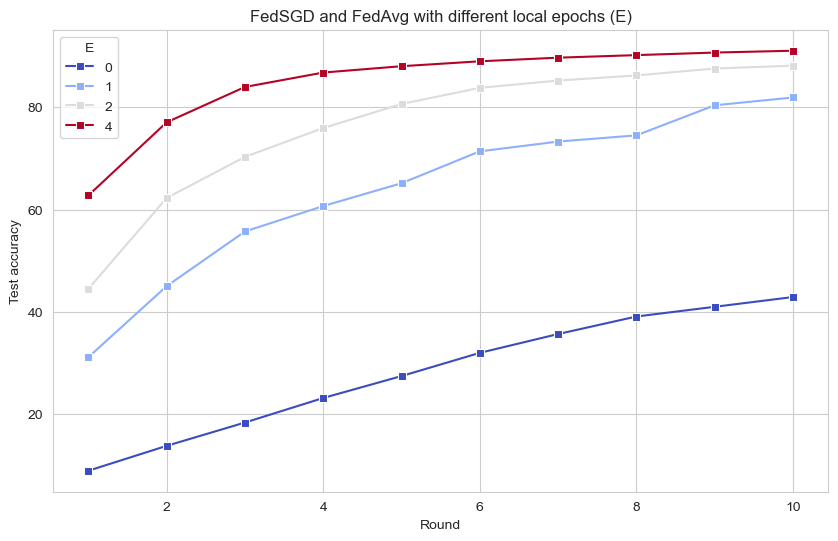

In [80]:
results = pd.concat([*fed_avg_df, fed_sgd_df], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='Round', y='Test accuracy', hue="E", palette="coolwarm", marker="s")

plt.title('FedSGD and FedAvg with different local epochs (E)')
plt.show()

#### Question 2 

_(2 points)_ Make one line plot of FedSGD and FedAvg under an IID and non-IID split for 15 rounds (leaving all other parameter values as they previously mentioned default). How does the non-IID setting affect the accuracy achieved by the two algorithms? What is the difference in terms of the smoothness of learning?


#### Answer 2

In [82]:
# FedAVG IID case
sample_split = split(n, True, seed)
rounds = 15
fed_avg_server_iid_15_rounds = FedAvgServer(lr, n, sample_split, c, e, seed)

print(f"Running FedAVG for IID, {rounds} rounds")

fed_avg_result_iid_15_rounds = fed_avg_server_iid_15_rounds.run(rounds)
fed_avg_iid_15_df = fed_avg_result_iid_15_rounds.as_df()

Running FedAVG for IID, 15 rounds


In [84]:
# FedAVG NON IID CASE
sample_split_non_iid = split(n, False, seed)
fed_avg_server_non_iid_15_rounds = FedAvgServer(lr, n, sample_split_non_iid, c, e, seed)

print(f"Running FedAVG for NON IID, {rounds} rounds")

fed_avg_result_non_iid_15_rounds = fed_avg_server_non_iid_15_rounds.run(rounds)
fed_avg_non_iid_15_df = fed_avg_result_non_iid_15_rounds.as_df()

Running FedAVG for NON IID, 15 rounds


In [85]:
# FedSGD IID case
fed_sgd_server_iid_15_rounds = FedSgdGradientServer(lr, sample_split, c, seed)

print(f"Running FedSGD for IID, {rounds} rounds")

fed_sgd_result_iid_15_rounds = fed_sgd_server_iid_15_rounds.run(rounds)
fed_sgd_iid_15_df = fed_sgd_result_iid_15_rounds.as_df()

Running FedSGD for IID, 15 rounds


In [90]:
# FedSGD NON IID case
fed_sgd_server_non_iid_15_rounds = FedSgdGradientServer(lr, sample_split_non_iid, c, seed)

print(f"Running FedSGD for NON IID, {rounds} rounds")

fed_sgd_result_non_iid_15_rounds = fed_sgd_server_non_iid_15_rounds.run(rounds)
fed_sgd_non_iid_15_df = fed_sgd_result_non_iid_15_rounds.as_df()

Running FedSGD for NON IID, 15 rounds


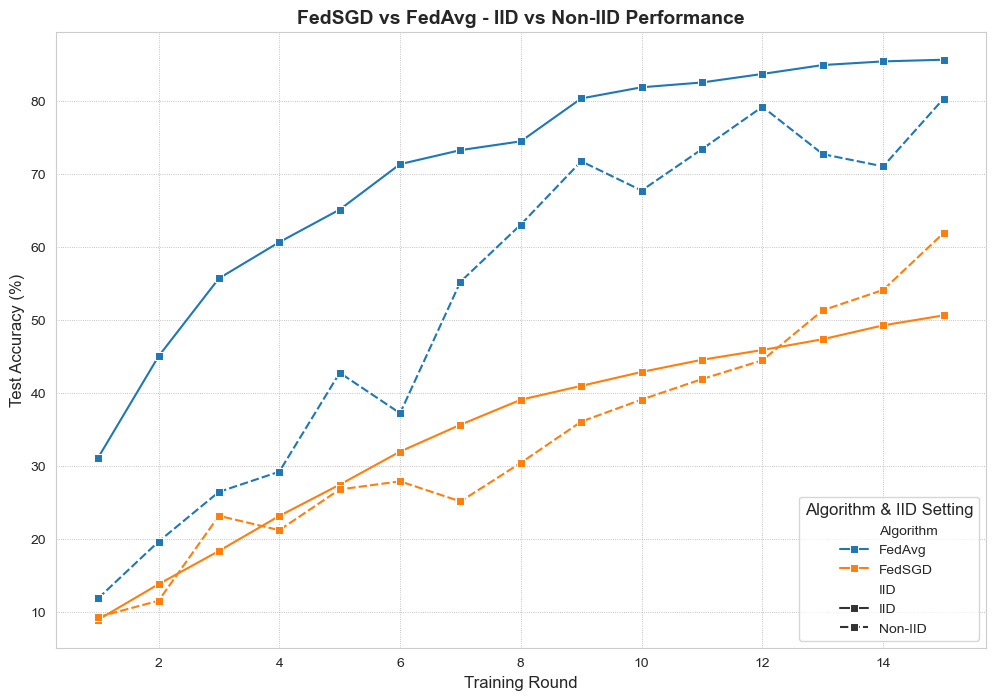

In [92]:
# Combine all results into a single df for plotting
df_iid_non_iid = pd.concat([
    fed_avg_iid_15_df.assign(Algorithm="FedAvg", IID="IID"),
    fed_avg_non_iid_15_df.assign(Algorithm="FedAvg", IID="Non-IID"),
    fed_sgd_iid_15_df.assign(Algorithm="FedSGD", IID="IID"),
    fed_sgd_non_iid_15_df.assign(Algorithm="FedSGD", IID="Non-IID")
], ignore_index=True)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_iid_non_iid, x="Round", y="Test accuracy", hue="Algorithm", style="IID", marker="s")

plt.title("FedSGD vs FedAvg - IID vs Non-IID Performance", fontsize=14, fontweight='bold')
plt.xlabel("Training Round", fontsize=12)
plt.ylabel("Test Accuracy (%)", fontsize=12)
plt.legend(title="Algorithm & IID Setting", fontsize=10, title_fontsize=12, loc="lower right")
plt.grid(color="gray", linestyle="dotted", linewidth=0.6, alpha=0.6)

plt.show()

#### Question 3

_(2 points)_ Make another plot for only non-IID splits, including the FedSGD and FedAvg configs from before, and add a version for each with a learning rate of 0.001 and client fraction of 0.5. How does the stability of the new variants compare to the old ones? Why do the changes in parameters have the observed effect?

#### Answer 3

In [94]:
learning_rate = 0.001
client_fraction = 0.5

fed_avg_server_non_iid = FedAvgServer(learning_rate, n, sample_split_non_iid, client_fraction, e, seed)

print(f"Running FedAVG for Non IID, {rounds} rounds, {learning_rate} learning rate, {client_fraction} client fraction.")

fed_avg_server_non_iid_result = fed_avg_server_non_iid.run(rounds)

fed_avg_server_non_iid_df = fed_avg_server_non_iid_result.as_df()

Running FedAVG for Non IID, 15 rounds, 0.001 learning rate, 0.5 client fraction.


In [95]:
fed_sgd_server_non_iid = FedSgdGradientServer(learning_rate, sample_split_non_iid, client_fraction, seed)

print(f"Running FedSGD for Non IID, {rounds} rounds, {learning_rate} learning rate, {client_fraction} client fraction.")

fed_sgd_server_non_iid_result = fed_sgd_server_non_iid.run(rounds)
fed_sgd_server_non_iid_df = fed_sgd_server_non_iid_result.as_df()

Running FedSGD for Non IID, 15 rounds, 0.001 learning rate, 0.5 client fraction.


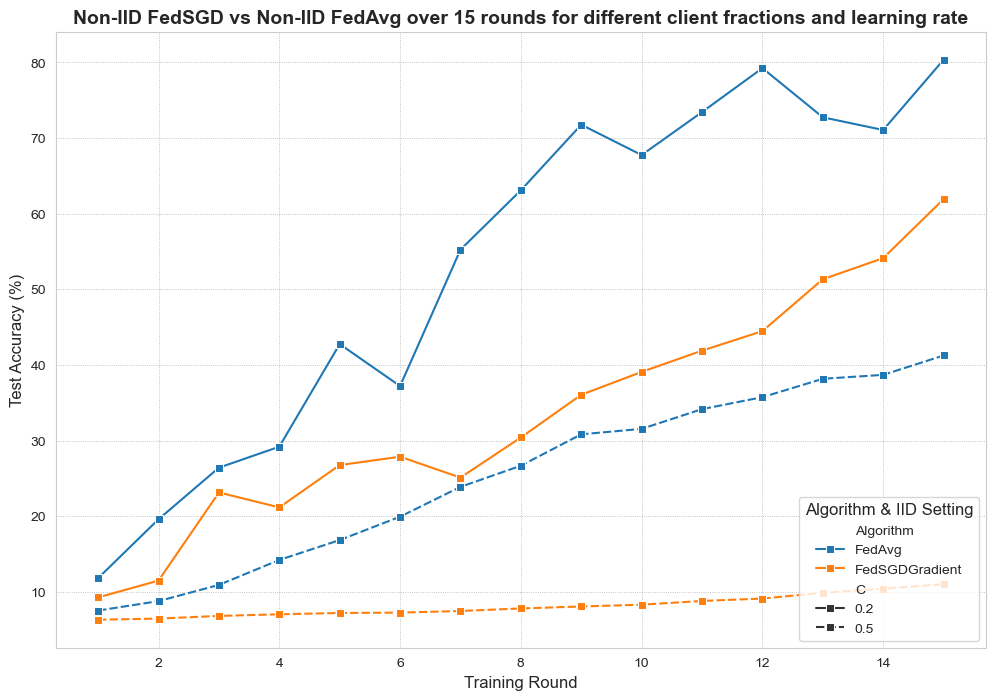

In [97]:
df_iid_non_iid_lr_cf = pd.concat([fed_avg_server_non_iid_df, fed_avg_non_iid_15_df, fed_sgd_server_non_iid_df, fed_sgd_non_iid_15_df], ignore_index=True)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_iid_non_iid_lr_cf, x="Round", y="Test accuracy", hue="Algorithm", style="C", marker="s")

plt.title("Non-IID FedSGD vs Non-IID FedAvg over 15 rounds for different client fractions and learning rate", fontsize=14, fontweight='bold')
plt.xlabel("Training Round", fontsize=12)
plt.ylabel("Test Accuracy (%)", fontsize=12)
plt.legend(title="Algorithm & IID Setting", fontsize=10, title_fontsize=12, loc="lower right")
plt.grid(color="gray", linestyle="dotted", linewidth=0.6, alpha=0.6)

plt.show()


## Part B (12 points)

### Exercise B1: Microbatch Pipeline Model Parallelism (7 points)

Implement pipeline parallelism with microbatches, as discussed during the lab.

As with the other data/model parallelism examples, you will need a Python script for the nodes and a shell script to orchestrate execution.

Be aware of the possibility of deadlocks: due to how `good` operates, it is possible to deadlock by having device 1 send $B_2$ to device 2 in the forward pass, and simultaneously, device 2 send $B_1$ in the backward pass.
Since both operations will await a corresponding receive the training will stop indefinitely.

Use `isend` & `irecv`, the asynchronous (non-blocking) versions of `send` & `recv` in `torch.distributed`.
Add comments or text explaining how you expect your implementation to work and test that it runs for the same number of steps and model architecture as in class.

Note that `torch.distributed`'s implementation of `gloo` does not currently support properly asynchronous communication even when using the corresponding primitives.
Thus, you will not see the same improvements in speed as with a backend like `nccl`.

You may also take advantage of the fact that `torch` gradients naturally accumulate if zeroed out.
Also, scaling the loss by a constant is equivalent to scaling the resulting gradients by the same constant.

### Exercise B2: Joint Data & Model Parallelism (5 points)

Implement a training setup that uses data and model parallelism together.

Create 2 pipelines of 3 stages running sequentially, where each stage works with 3 sequential micro-batches.

Once again, add comments or text explaining your implementation and test it on the setting that mimics those from the class.

You can use groups from `torch.distributed` to handle operations that require interaction between a subset of more than two but less than all workers.